In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from functions2 import clean_data
df = pd.read_csv("fifa21_train.csv")
# pd.set_option('display.max_columns', None)

df.head()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [2]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,11701.0,NaN,NaN,NaN,219436.649004,37480.006004,27.0,204060.0,229040.0,244176.0,259090.0
Name,11701,11232,J. Rojas,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,11701.0,NaN,NaN,NaN,25.27049,4.95764,16.0,21.0,25.0,29.0,43.0
Nationality,11701,159,England,1162,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Club,11683,885,OGC Nice,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
CB,11701,313,63+2,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RCB,11701,313,63+2,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RB,11701,262,62+2,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GK,11701,155,16+2,2157,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

ID              int64
Name           object
Age             int64
Nationality    object
Club           object
                ...  
CB             object
RCB            object
RB             object
GK             object
OVA             int64
Length: 101, dtype: object

In [4]:
df.columns.values

array(['ID', 'Name', 'Age', 'Nationality', 'Club', 'BP', 'Position',
       'Team & Contract', 'Height', 'Weight', 'foot', 'Growth', 'Joined',
       'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W',
       'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits',
       'LS', 'ST', 'RS', 'LW', 'LF', 

In [5]:
data2 = df.drop(["Name", "Nationality", "Club", "Position", "Joined", "Loan Date End", "Wage" , "Release Clause", "GK Diving", "GK Handling" , "GK Kicking", "GK Positioning", "GK Reflexes"], axis = 1)

In [6]:
data2.head()

,ID,Age,BP,Team & Contract,Height,Weight,foot,Growth,Value,Contract,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,26,CM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,€525K,2015 ~ 2020,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,30,ST,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,€8.5M,"Dec 31, 2020 On Loan",...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,33,CAM,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,€9M,2019 ~ 2022,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,22,CDM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,€275K,2016 ~ 2021,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,23,CDM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,€725K,2018 ~ 2021,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [7]:
data2.columns.values

array(['ID', 'Age', 'BP', 'Team & Contract', 'Height', 'Weight', 'foot',
       'Growth', 'Value', 'Contract', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed',
       'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power',
       'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality',
       'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF',
       'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM',
       'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'GK', 'OVA'], dtype=object)

In [8]:
data2 = data2[['BP', 'Age', 'Height', 'Weight', 'foot', 'Growth', 'Value', 'Skill', 'Movement', 'Power', 'Mentality', 'Defending', 'Goalkeeping', 'Total Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS','DRI', 'DEF', 'PHY','OVA']]

In [9]:
data2.head().T

,0,1,2,3,4
BP,CM,ST,CAM,CDM,CDM
Age,26,30,33,22,23
Height,"5'9""","6'0""","5'4""","5'10""","5'11"""
Weight,161lbs,159lbs,134lbs,152lbs,150lbs
foot,Right,Right,Right,Right,Right
Growth,1,0,0,13,8
Value,€525K,€8.5M,€9M,€275K,€725K
Skill,286,375,424,259,280
Movement,346,404,424,282,324
Power,306,372,308,277,280


In [10]:
data2.describe(include = 'all')

,BP,Age,Height,Weight,foot,Growth,Value,Skill,Movement,Power,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA
count,11701,11701.00000,11701,11701,11701,11701.000000,11701,11701.000000,11701.000000,11701.000000,...,11642,11642,11701,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000
unique,15,NaN,21,55,2,NaN,203,NaN,NaN,NaN,...,3,3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CB,NaN,"6'0""",154lbs,Right,NaN,€1.1M,NaN,NaN,NaN,...,Medium,Medium,1 ★,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2170,NaN,1751,931,8828,NaN,342,NaN,NaN,NaN,...,7494,8350,10359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,25.27049,NaN,NaN,NaN,5.534655,NaN,266.497222,322.617383,302.083326,...,NaN,NaN,NaN,68.095206,55.046406,58.893257,64.223229,50.030254,64.817964,66.921972
std,NaN,4.95764,NaN,NaN,NaN,5.810903,NaN,76.835287,55.330054,49.697749,...,NaN,NaN,NaN,11.247282,13.851853,10.174939,9.818311,16.841283,9.757873,6.876081
min,NaN,16.00000,NaN,NaN,NaN,-1.000000,NaN,43.000000,113.000000,133.000000,...,NaN,NaN,NaN,26.000000,17.000000,25.000000,28.000000,12.000000,27.000000,38.000000
25%,NaN,21.00000,NaN,NaN,NaN,0.000000,NaN,232.000000,294.000000,271.000000,...,NaN,NaN,NaN,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000,62.000000
50%,NaN,25.00000,NaN,NaN,NaN,4.000000,NaN,279.000000,331.000000,308.000000,...,NaN,NaN,NaN,69.000000,58.000000,59.000000,65.000000,53.000000,66.000000,67.000000
75%,NaN,29.00000,NaN,NaN,NaN,10.000000,NaN,319.000000,361.000000,339.000000,...,NaN,NaN,NaN,76.000000,65.000000,66.000000,71.000000,64.000000,72.000000,72.000000


In [11]:
data2.columns

Index(['BP', 'Age', 'Height', 'Weight', 'foot', 'Growth', 'Value', 'Skill',
       'Movement', 'Power', 'Mentality', 'Defending', 'Goalkeeping',
       'Total Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'OVA'],
      dtype='object')

In [12]:
data2.dtypes

BP             object
Age             int64
Height         object
Weight         object
foot           object
Growth          int64
Value          object
Skill           int64
Movement        int64
Power           int64
Mentality       int64
Defending       int64
Goalkeeping     int64
Total Stats     int64
W/F            object
SM             object
A/W            object
D/W            object
IR             object
PAC             int64
SHO             int64
PAS             int64
DRI             int64
DEF             int64
PHY             int64
OVA             int64
dtype: object

In [13]:
def feet_to_cm(height_str):
    feet, inches = map(int, height_str.replace('"', '').split("'"))
    total_inches = (feet * 12) + inches
    cm = total_inches * 2.54
    return cm

data2['Height'] = data2['Height'].apply(feet_to_cm)

In [14]:
data2.head()

,BP,Age,Height,Weight,foot,Growth,Value,Skill,Movement,Power,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,CM,26,175.26,161lbs,Right,1,€525K,286,346,306,...,High,Medium,1 ★,69,51,63,63,51,60,64
1,ST,30,182.88,159lbs,Right,0,€8.5M,375,404,372,...,High,Low,2 ★,83,75,68,82,33,71,77
2,CAM,33,162.56,134lbs,Right,0,€9M,424,424,308,...,High,Medium,2 ★,80,77,78,86,27,56,80
3,CDM,22,177.80,152lbs,Right,13,€275K,259,282,277,...,Medium,Medium,1 ★,57,44,54,57,57,60,59
4,CDM,23,180.34,150lbs,Right,8,€725K,280,324,280,...,Low,Medium,1 ★,66,44,60,64,60,66,65


In [15]:
data2['Weight'] = data2['Weight'].str.replace('lbs', '').astype(float)

In [16]:
data2.head()

,BP,Age,Height,Weight,foot,Growth,Value,Skill,Movement,Power,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,CM,26,175.26,161.0,Right,1,€525K,286,346,306,...,High,Medium,1 ★,69,51,63,63,51,60,64
1,ST,30,182.88,159.0,Right,0,€8.5M,375,404,372,...,High,Low,2 ★,83,75,68,82,33,71,77
2,CAM,33,162.56,134.0,Right,0,€9M,424,424,308,...,High,Medium,2 ★,80,77,78,86,27,56,80
3,CDM,22,177.80,152.0,Right,13,€275K,259,282,277,...,Medium,Medium,1 ★,57,44,54,57,57,60,59
4,CDM,23,180.34,150.0,Right,8,€725K,280,324,280,...,Low,Medium,1 ★,66,44,60,64,60,66,65


In [17]:
data2.dtypes

BP              object
Age              int64
Height         float64
Weight         float64
foot            object
Growth           int64
Value           object
Skill            int64
Movement         int64
Power            int64
Mentality        int64
Defending        int64
Goalkeeping      int64
Total Stats      int64
W/F             object
SM              object
A/W             object
D/W             object
IR              object
PAC              int64
SHO              int64
PAS              int64
DRI              int64
DEF              int64
PHY              int64
OVA              int64
dtype: object

In [18]:
def convert_value(value_str):
    value_str = value_str.replace('€', '') 
    if value_str.endswith('K'):
        return float(value_str[:-1]) * 1000  
    elif value_str.endswith('M'):
        return float(value_str[:-1]) * 1000000  
    else:
        return float(value_str)  

data2['Value'] = data2['Value'].apply(convert_value)

In [19]:
data2.head()

,BP,Age,Height,Weight,foot,Growth,Value,Skill,Movement,Power,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,CM,26,175.26,161.0,Right,1,525000.0,286,346,306,...,High,Medium,1 ★,69,51,63,63,51,60,64
1,ST,30,182.88,159.0,Right,0,8500000.0,375,404,372,...,High,Low,2 ★,83,75,68,82,33,71,77
2,CAM,33,162.56,134.0,Right,0,9000000.0,424,424,308,...,High,Medium,2 ★,80,77,78,86,27,56,80
3,CDM,22,177.80,152.0,Right,13,275000.0,259,282,277,...,Medium,Medium,1 ★,57,44,54,57,57,60,59
4,CDM,23,180.34,150.0,Right,8,725000.0,280,324,280,...,Low,Medium,1 ★,66,44,60,64,60,66,65


In [20]:
data2.isna().sum()

BP              0
Age             0
Height          0
Weight          0
foot            0
Growth          0
Value           0
Skill           0
Movement        0
Power           0
Mentality       0
Defending       0
Goalkeeping     0
Total Stats     0
W/F             0
SM              0
A/W            59
D/W            59
IR              0
PAC             0
SHO             0
PAS             0
DRI             0
DEF             0
PHY             0
OVA             0
dtype: int64

In [21]:
data2["W/F"] = data2["W/F"].str.replace("★", "" )
data2["W/F"] = pd.to_numeric(data2["W/F"], errors='coerce')

In [22]:
data2.head()

,BP,Age,Height,Weight,foot,Growth,Value,Skill,Movement,Power,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,CM,26,175.26,161.0,Right,1,525000.0,286,346,306,...,High,Medium,1 ★,69,51,63,63,51,60,64
1,ST,30,182.88,159.0,Right,0,8500000.0,375,404,372,...,High,Low,2 ★,83,75,68,82,33,71,77
2,CAM,33,162.56,134.0,Right,0,9000000.0,424,424,308,...,High,Medium,2 ★,80,77,78,86,27,56,80
3,CDM,22,177.80,152.0,Right,13,275000.0,259,282,277,...,Medium,Medium,1 ★,57,44,54,57,57,60,59
4,CDM,23,180.34,150.0,Right,8,725000.0,280,324,280,...,Low,Medium,1 ★,66,44,60,64,60,66,65


In [23]:
data2["SM"] = data2["SM"].str.replace("★", "" )
data2["SM"] = pd.to_numeric(data2["SM"], errors='coerce')

In [24]:
data2["IR"] = data2["IR"].str.replace(" ★", "" )
data2["IR"] = pd.to_numeric(data2["IR"], errors='coerce')

In [25]:
data2.head()

,BP,Age,Height,Weight,foot,Growth,Value,Skill,Movement,Power,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,CM,26,175.26,161.0,Right,1,525000.0,286,346,306,...,High,Medium,1,69,51,63,63,51,60,64
1,ST,30,182.88,159.0,Right,0,8500000.0,375,404,372,...,High,Low,2,83,75,68,82,33,71,77
2,CAM,33,162.56,134.0,Right,0,9000000.0,424,424,308,...,High,Medium,2,80,77,78,86,27,56,80
3,CDM,22,177.80,152.0,Right,13,275000.0,259,282,277,...,Medium,Medium,1,57,44,54,57,57,60,59
4,CDM,23,180.34,150.0,Right,8,725000.0,280,324,280,...,Low,Medium,1,66,44,60,64,60,66,65


In [26]:
data2["D/W"] = data2["D/W"].fillna('Medium') 
data2["A/W"] = data2["D/W"].fillna('Medium')

In [27]:
categorical = data2.select_dtypes('object')

In [28]:
numerical = data2._get_numeric_data()

In [29]:
categorical.head()

,BP,foot,A/W,D/W
0,CM,Right,Medium,Medium
1,ST,Right,Low,Low
2,CAM,Right,Medium,Medium
3,CDM,Right,Medium,Medium
4,CDM,Right,Medium,Medium


In [30]:
numerical.head()

,Age,Height,Weight,Growth,Value,Skill,Movement,Power,Mentality,Defending,...,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,26,175.26,161.0,1,525000.0,286,346,306,290,148,...,4,2,1,69,51,63,63,51,60,64
1,30,182.88,159.0,0,8500000.0,375,404,372,313,77,...,3,4,2,83,75,68,82,33,71,77
2,33,162.56,134.0,0,9000000.0,424,424,308,332,80,...,4,4,2,80,77,78,86,27,56,80
3,22,177.80,152.0,13,275000.0,259,282,277,257,168,...,2,2,1,57,44,54,57,57,60,59
4,23,180.34,150.0,8,725000.0,280,324,280,294,185,...,2,3,1,66,44,60,64,60,66,65


In [31]:
categorical['A/W'].value_counts(dropna=False)

Medium    8409
High      2027
Low       1265
Name: A/W, dtype: int64

In [32]:
categorical['D/W'].value_counts(dropna=False)

Medium    8409
High      2027
Low       1265
Name: D/W, dtype: int64

In [33]:
X = numerical.drop(["OVA"], axis = 1)
y = data2["OVA"]

X.head()

,Age,Height,Weight,Growth,Value,Skill,Movement,Power,Mentality,Defending,...,Total Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY
0,26,175.26,161.0,1,525000.0,286,346,306,290,148,...,1682,4,2,1,69,51,63,63,51,60
1,30,182.88,159.0,0,8500000.0,375,404,372,313,77,...,1961,3,4,2,83,75,68,82,33,71
2,33,162.56,134.0,0,9000000.0,424,424,308,332,80,...,1925,4,4,2,80,77,78,86,27,56
3,22,177.80,152.0,13,275000.0,259,282,277,257,168,...,1527,2,2,1,57,44,54,57,57,60
4,23,180.34,150.0,8,725000.0,280,324,280,294,185,...,1664,2,3,1,66,44,60,64,60,66


In [34]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=X.columns)

scaled_df.head()


,Age,Height,Weight,Growth,Value,Skill,Movement,Power,Mentality,Defending,...,Total Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY
0,0.370370,0.40,0.349206,0.074074,0.005833,0.569087,0.663818,0.556270,0.654596,0.524,...,0.604577,0.75,0.25,0.00,0.614286,0.447368,0.558824,0.522388,0.506494,0.500000
1,0.518519,0.55,0.333333,0.037037,0.094444,0.777518,0.829060,0.768489,0.718663,0.240,...,0.781945,0.50,0.75,0.25,0.814286,0.763158,0.632353,0.805970,0.272727,0.666667
2,0.629630,0.15,0.134921,0.037037,0.100000,0.892272,0.886040,0.562701,0.771588,0.252,...,0.759059,0.75,0.75,0.25,0.771429,0.789474,0.779412,0.865672,0.194805,0.439394
3,0.222222,0.45,0.277778,0.518519,0.003056,0.505855,0.481481,0.463023,0.562674,0.604,...,0.506039,0.25,0.25,0.00,0.442857,0.355263,0.426471,0.432836,0.584416,0.500000
4,0.259259,0.50,0.261905,0.333333,0.008056,0.555035,0.601140,0.472669,0.665738,0.672,...,0.593134,0.25,0.50,0.00,0.571429,0.355263,0.514706,0.537313,0.623377,0.590909


In [35]:
encoder = OneHotEncoder(drop='first').fit(categorical)

cols = encoder.get_feature_names_out(input_features=categorical.columns)
categorical_encode = pd.DataFrame(encoder.transform(categorical).toarray(),columns=cols)
categorical_encode.head().T

,0,1,2,3,4
BP_CB,0.0,0.0,0.0,0.0,0.0
BP_CDM,0.0,0.0,0.0,1.0,1.0
BP_CF,0.0,0.0,0.0,0.0,0.0
BP_CM,1.0,0.0,0.0,0.0,0.0
BP_GK,0.0,0.0,0.0,0.0,0.0
BP_LB,0.0,0.0,0.0,0.0,0.0
BP_LM,0.0,0.0,0.0,0.0,0.0
BP_LW,0.0,0.0,0.0,0.0,0.0
BP_LWB,0.0,0.0,0.0,0.0,0.0
BP_RB,0.0,0.0,0.0,0.0,0.0


In [36]:
data3 = pd.concat([scaled_df, categorical_encode, y], axis=1)

In [37]:
data3.head().T

,0,1,2,3,4
Age,0.370370,0.518519,0.629630,0.222222,0.259259
Height,0.400000,0.550000,0.150000,0.450000,0.500000
Weight,0.349206,0.333333,0.134921,0.277778,0.261905
Growth,0.074074,0.037037,0.037037,0.518519,0.333333
Value,0.005833,0.094444,0.100000,0.003056,0.008056
Skill,0.569087,0.777518,0.892272,0.505855,0.555035
Movement,0.663818,0.829060,0.886040,0.481481,0.601140
Power,0.556270,0.768489,0.562701,0.463023,0.472669
Mentality,0.654596,0.718663,0.771588,0.562674,0.665738
Defending,0.524000,0.240000,0.252000,0.604000,0.672000


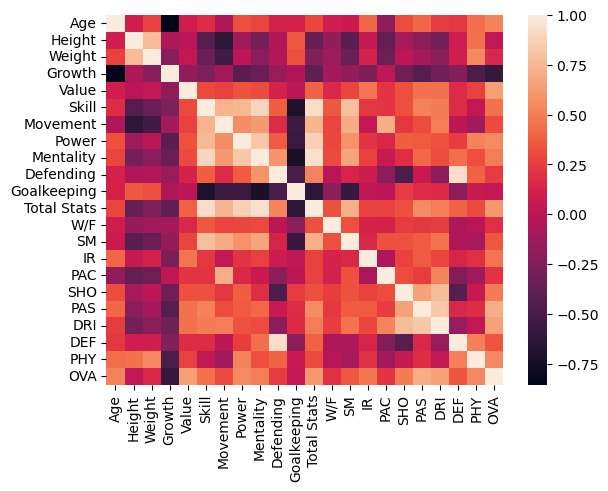

,Age,Height,Weight,Growth,Value,Skill,Movement,Power,Mentality,Defending,...,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA
Age,1.000000,0.095369,0.257338,-0.854136,0.096757,0.175981,-0.051802,0.314169,0.278804,0.117902,...,0.088939,0.072587,0.402010,-0.176232,0.311175,0.402361,0.242675,0.225285,0.434448,0.519799
Height,0.095369,1.000000,0.768096,-0.053797,-0.002372,-0.454377,-0.634614,-0.129197,-0.301619,-0.054541,...,-0.161631,-0.423024,0.054875,-0.380658,-0.087724,-0.204511,-0.310837,0.090802,0.444814,0.028210
Weight,0.257338,0.768096,1.000000,-0.219624,0.035361,-0.352398,-0.536489,0.007573,-0.197294,-0.040950,...,-0.119104,-0.348603,0.119917,-0.341935,0.013883,-0.100392,-0.210029,0.101667,0.538053,0.149397
Growth,-0.854136,-0.053797,-0.219624,1.000000,-0.186735,-0.262893,-0.101370,-0.427800,-0.348028,-0.157743,...,-0.104888,-0.165475,-0.269322,0.019677,-0.334891,-0.439781,-0.320569,-0.240244,-0.484123,-0.596642
Value,0.096757,-0.002372,0.035361,-0.186735,1.000000,0.297288,0.262040,0.326979,0.303380,0.127014,...,0.151226,0.276583,0.457919,0.215480,0.325187,0.444784,0.442928,0.168934,0.265114,0.632303
Skill,0.175981,-0.454377,-0.352398,-0.262893,0.297288,1.000000,0.725776,0.753061,0.885893,0.370432,...,0.354396,0.789008,0.225664,0.217046,0.325009,0.514101,0.486271,0.171817,0.031079,0.442666
Movement,-0.051802,-0.634614,-0.536489,-0.101370,0.262040,0.725776,1.000000,0.560489,0.610661,0.174070,...,0.279000,0.700280,0.032241,0.705488,0.227513,0.307423,0.497619,0.008547,-0.111590,0.304496
Power,0.314169,-0.129197,0.007573,-0.427800,0.326979,0.753061,0.560489,1.000000,0.823428,0.361816,...,0.289072,0.583623,0.208833,0.157692,0.374796,0.355994,0.332691,0.248330,0.519953,0.547839
Mentality,0.278804,-0.301619,-0.197294,-0.348028,0.303380,0.885893,0.610661,0.823428,1.000000,0.587906,...,0.295172,0.661055,0.260338,0.065620,0.186766,0.408774,0.308240,0.429305,0.312193,0.494590
Defending,0.117902,-0.054541,-0.040950,-0.157743,0.127014,0.370432,0.174070,0.361816,0.587906,1.000000,...,-0.005030,0.134446,0.077214,-0.213725,-0.485337,0.061623,-0.205621,0.928767,0.388696,0.243725


In [38]:
# I am going to check the colinearity of the factors, to check if some factors should be dropped

correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix)
plt.show()

correlations_matrix

In [39]:
# Total Stats is both high correlated with both Mentality and Sill. DEF is highly correlated with Defence Going to drop it

X = X.drop(columns=['Total Stats'])
X = X.drop(columns=['DEF'])

# Going to drop age since it is highly correlated with growth
X = X.drop(columns=['Age'])

X.head()


,Height,Weight,Growth,Value,Skill,Movement,Power,Mentality,Defending,Goalkeeping,W/F,SM,IR,PAC,SHO,PAS,DRI,PHY
0,175.26,161.0,1,525000.0,286,346,306,290,148,48,4,2,1,69,51,63,63,60
1,182.88,159.0,0,8500000.0,375,404,372,313,77,55,3,4,2,83,75,68,82,71
2,162.56,134.0,0,9000000.0,424,424,308,332,80,21,4,4,2,80,77,78,86,56
3,177.80,152.0,13,275000.0,259,282,277,257,168,42,2,2,1,57,44,54,57,60
4,180.34,150.0,8,725000.0,280,324,280,294,185,52,2,3,1,66,44,60,64,66


In [46]:
# Going to drop Mentality and Power sinse they are much correlated with Skill
X = X.drop(columns=['Mentality'])
X = X.drop(columns=['Power'])

In [47]:
lm = linear_model.LinearRegression()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
lm.fit(X_train,y_train)

LinearRegression()

In [50]:
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.8276740148738709

In [51]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.8377628428298876

In [53]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

7.69440954553649

In [55]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
rmse

2.7738798722252715